In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

### Create noisy signal

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:

N = 250
# clean signal
x = np.arange(N)
y = 5*np.random.randn(8)
interv = sorted(np.random.choice(N, 7, replace=False))
interv = np.concatenate((np.array([0]), interv, np.array([N])))
f0 = [np.tile(y[i-1], interv[i]-interv[i-1]) for i in range(1, len(interv))]
f0 = np.concatenate(f0)
f = f0 + np.random.randn(N);

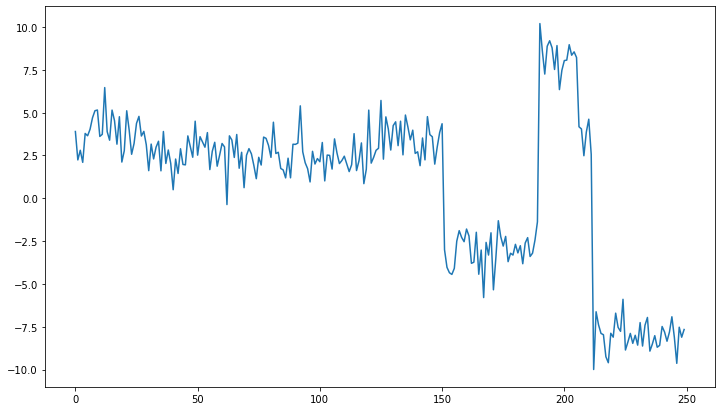

In [9]:
plt.figure(figsize=(12,7))
plt.plot(f)
# plt.plot(f0)

In [16]:
# Defina lambda, epsilon, number of iterations
lambda_ = 0
epsilon = 5e-4
Nit = 2000

![gradients](gradients.png)

In [17]:
# Write gradient descent
u = f
for i in range(Nit):
    # compute the gradient
    du = np.sign(u[1:-1] - u[:-2]) - np.sign(u[2:]-u[1:-1]) + lambda_*(u[1:-1] - f[1:-1]) # n=2..N-1
    d0 = -np.sign(u[1]-u[0]) + lambda_*(u[0]-f[0])
    dN = np.sign(u[-1] - u[-2]) + lambda_ * (u[-1] - f[-1])
    du = np.concatenate((np.array([d0]), du, np.array([dN])))
    
    u = u - epsilon * du

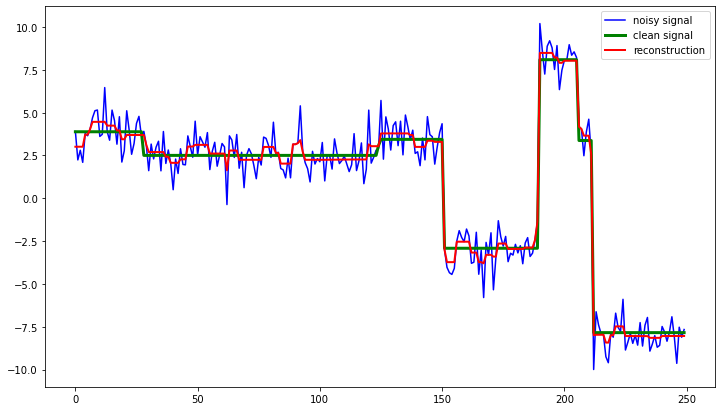

In [18]:
plt.figure(figsize=(12,7))
plt.plot(f, 'b')
plt.plot(f0, 'g', linewidth=3.0)
plt.plot(u, 'r', linewidth=2.0)
plt.legend(['noisy signal', 'clean signal', 'reconstruction'])